In [ ]:
# Sarcini

# 1. [6p] Completați algoritmul JPEG incluzând toate blocurile din imagine.

# 2. [4p] Extindeți la imagini color (incluzând transformarea din RGB în Y'CbCr). Exemplificați pe `scipy.misc.face` folosită în tema anterioară.

# 3. [6p] Extindeți algoritmul pentru compresia imaginii până la un prag MSE impus de utilizator.

# 4. [4p] Extindeți algoritmul pentru compresie video. Demonstrați pe un clip scurt din care luați fiecare cadru și îl tratați ca pe o imagine.

C:\Users\andre\AppData\Local\Temp\ipykernel_4880\2140234836.py:37: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  X = misc.ascent()


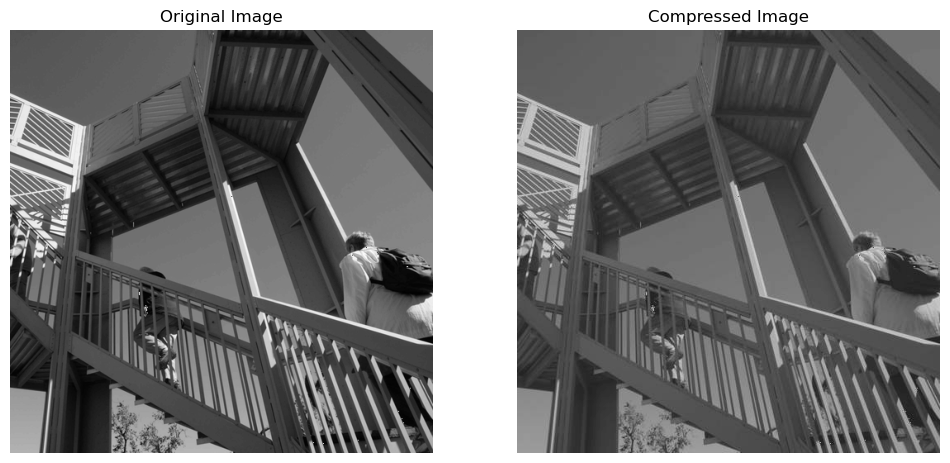

In [2]:
#1
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
from scipy import misc

Q_jpeg = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                   [12, 12, 14, 19, 26, 28, 60, 55],
                   [14, 13, 16, 24, 40, 57, 69, 56],
                   [14, 17, 22, 29, 51, 87, 80, 62],
                   [18, 22, 37, 56, 68, 109, 103, 77],
                   [24, 35, 55, 64, 81, 104, 113, 92],
                   [49, 64, 78, 87, 103, 121, 120, 101],
                   [72, 92, 95, 98, 112, 100, 103, 99]])

def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

def jpeg_compress(image, quantization_matrix):
    h, w = image.shape
    h_pad = (8 - h % 8) % 8
    w_pad = (8 - w % 8) % 8
    image_padded = np.pad(image, ((0, h_pad), (0, w_pad)), mode='constant', constant_values=0)
    
    compressed = np.zeros_like(image_padded)
    for i in range(0, h_pad + h, 8):
        for j in range(0, w_pad + w, 8):
            block = image_padded[i:i+8, j:j+8]
            dct_block = dct2(block)
            quantized = np.round(dct_block / quantization_matrix) * quantization_matrix
            compressed[i:i+8, j:j+8] = idct2(quantized)
    return compressed

X = misc.ascent()
compressed_X = jpeg_compress(X, Q_jpeg)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(X, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_X, cmap='gray')
plt.title('Compressed Image')
plt.axis('off')
plt.show()


C:\Users\andre\AppData\Local\Temp\ipykernel_19952\4088971.py:25: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X = misc.face()


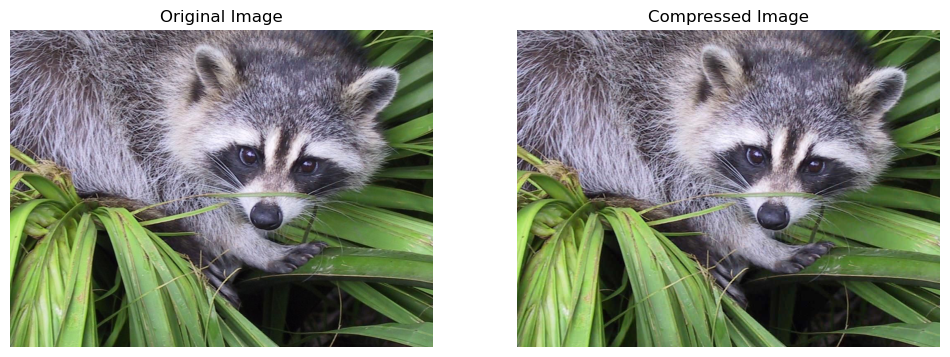

In [6]:
#2
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from skimage.color import rgb2ycbcr, ycbcr2rgb

def rgb_to_ycbcr(image):
    return rgb2ycbcr(image)

def ycbcr_to_rgb(image):
    return ycbcr2rgb(image)

def compress_color_image(image, quantization_matrix):
    ycbcr_image = rgb_to_ycbcr(image)
    compressed_ycbcr = np.zeros_like(ycbcr_image)

    for i in range(3):
        compressed_ycbcr[:, :, i] = jpeg_compress(ycbcr_image[:, :, i], quantization_matrix)

    return compressed_ycbcr

X = misc.face()
compressed_X_ycbcr = compress_color_image(X, Q_jpeg)
compressed_X_rgb = ycbcr_to_rgb(compressed_X_ycbcr)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(X)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.clip(compressed_X_rgb, 0, 1))
plt.title('Compressed Image')
plt.axis('off')
plt.show()


C:\Users\andre\AppData\Local\Temp\ipykernel_4880\254493270.py:61: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  X = misc.ascent()


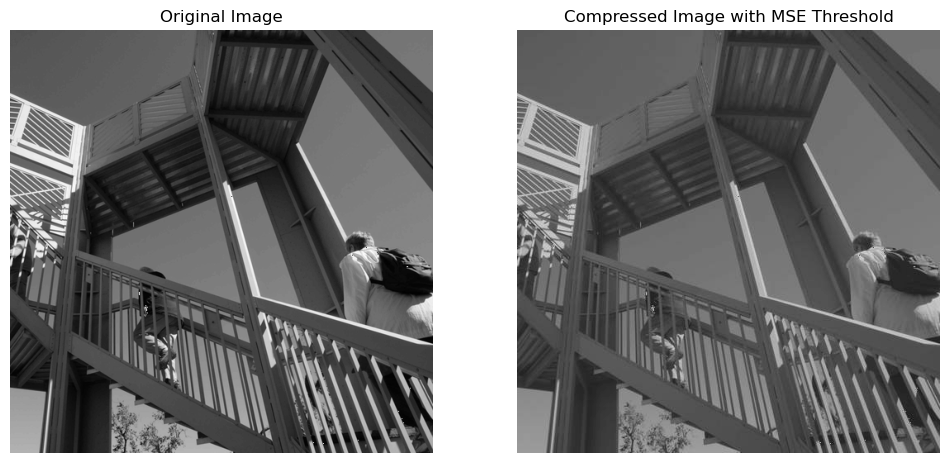

In [3]:
#3
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
from scipy import misc

Q_jpeg = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                   [12, 12, 14, 19, 26, 28, 60, 55],
                   [14, 13, 16, 24, 40, 57, 69, 56],
                   [14, 17, 22, 29, 51, 87, 80, 62],
                   [18, 22, 37, 56, 68, 109, 103, 77],
                   [24, 35, 55, 64, 81, 104, 113, 92],
                   [49, 64, 78, 87, 103, 121, 120, 101],
                   [72, 92, 95, 98, 112, 100, 103, 99]])

def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

def jpeg_compress(image, quantization_matrix):
    h, w = image.shape
    h_pad = (8 - h % 8) % 8
    w_pad = (8 - w % 8) % 8
    image_padded = np.pad(image, ((0, h_pad), (0, w_pad)), mode='constant', constant_values=0)
    
    compressed = np.zeros_like(image_padded)
    for i in range(0, h_pad + h, 8):
        for j in range(0, w_pad + w, 8):
            block = image_padded[i:i+8, j:j+8]
            dct_block = dct2(block)
            quantized = np.round(dct_block / quantization_matrix) * quantization_matrix
            compressed[i:i+8, j:j+8] = idct2(quantized)
    return compressed


def calculate_mse(original, compressed):
    return np.mean((original - compressed) ** 2)


def adjust_quantization_matrix(Q, factor):
    return Q * factor


def jpeg_compress_with_mse_threshold(image, Q_jpeg, mse_threshold):
    factor = 1.0
    compressed_image = jpeg_compress(image, Q_jpeg)
    current_mse = calculate_mse(image, compressed_image)

    while current_mse > mse_threshold:
        factor += 0.1
        adjusted_Q = adjust_quantization_matrix(Q_jpeg, factor)
        compressed_image = jpeg_compress(image, adjusted_Q)
        current_mse = calculate_mse(image, compressed_image)

    return compressed_image


mse_threshold = 500
X = misc.ascent()
compressed_X = jpeg_compress_with_mse_threshold(X, Q_jpeg, mse_threshold)

# Afisam rezultatul
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(X, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_X, cmap='gray')
plt.title('Compressed Image with MSE Threshold')
plt.axis('off')
plt.show()


In [ ]:
#4
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
from scipy import misc


Q_jpeg = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                   [12, 12, 14, 19, 26, 28, 60, 55],
                   [14, 13, 16, 24, 40, 57, 69, 56],
                   [14, 17, 22, 29, 51, 87, 80, 62],
                   [18, 22, 37, 56, 68, 109, 103, 77],
                   [24, 35, 55, 64, 81, 104, 113, 92],
                   [49, 64, 78, 87, 103, 121, 120, 101],
                   [72, 92, 95, 98, 112, 100, 103, 99]])

def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

def jpeg_compress(image, quantization_matrix):
    h, w = image.shape
    h_pad = (8 - h % 8) % 8
    w_pad = (8 - w % 8) % 8
    image_padded = np.pad(image, ((0, h_pad), (0, w_pad)), mode='constant', constant_values=0)
    
    compressed = np.zeros_like(image_padded)
    for i in range(0, h_pad + h, 8):
        for j in range(0, w_pad + w, 8):
            block = image_padded[i:i+8, j:j+8]
            dct_block = dct2(block)
            quantized = np.round(dct_block / quantization_matrix) * quantization_matrix
            compressed[i:i+8, j:j+8] = idct2(quantized)
    return compressed

def compress_video_frames(video_path, output_path, Q_jpeg):
    cap = cv2.VideoCapture(video_path)
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        compressed_frame = jpeg_compress(gray_frame, Q_jpeg)
        
        out.write(cv2.cvtColor(compressed_frame.astype(np.uint8), cv2.COLOR_GRAY2BGR))

    cap.release()
    out.release()

video_path = 'test.mp4'
output_path = 'compressed_video.mp4'

compress_video_frames(video_path, output_path, Q_jpeg)
